In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
df= pd.read_csv('train.csv',index_col= 'CUSTOMER_ID')
df.head(5)

C:\Users\ARNAB\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (8,11,12,13,14,15,16,17,18,19,21,23,26,28,29,30,32,82,83,85,91,269,325,326,327,328) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ACT_TYPE,GENDER,LEGAL_ENTITY,OCCUP_ALL_NEW,AGE,N_CASA_MAX_BALANCE_MTD,N_CASA_MIN_BALANCE_MTD,BL_TAG,TWL_TAG,PL_TAG,...,CREDIT_ACT,DEBIT_ACT,CEL_TAG,EL_TAG,AGL_TAG,CVL_TAG,AL_TAG,HL_EMI,SCRUB_EMI,RESPONDERS
CUSTOMER_ID,,,,,,,,,,,,,,,,,,,,,
385793,CSA,M,INDIVIDUAL,SALARIED,21,0.00,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,N
286891,CSA,M,INDIVIDUAL,SALARIED,23,8243.77,7.77,NaN,NaN,NaN,...,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,N
108751,CSA,M,INDIVIDUAL,SALARIED,41,26515.00,0.00,NaN,NaN,NaN,...,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,N
278651,CSA,M,INDIVIDUAL,SALARIED,28,65917.28,8270.28,NaN,NaN,Y,...,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,N
23637,CSA,M,INDIVIDUAL,SALARIED,34,22260.94,6060.94,NaN,NaN,NaN,...,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,251.758794,N


### 'NaN' to np.null

In [3]:
df.replace(to_replace='NaN', value= np.NaN , inplace=True)

### remove all columns if more than 25% are null

In [4]:
pct_null = df.isnull().sum() / len(df)
missing_features = pct_null[pct_null > 0.25].index
df.drop(missing_features, axis=1, inplace=True)

### remove all rows with null values

In [5]:
df.dropna(inplace=True)

### remove all columns with single values

In [6]:
df_d = df.nunique()
df_d = df_d.loc[df_d.values == 1].index
df.drop(df_d,axis = 1,inplace = True)

### replace N and Y with 0 and 1

In [7]:
df.replace(to_replace='N', value= 0 , inplace=True)
df.replace(to_replace='Y', value= 1 , inplace=True)

In [8]:
num = df.select_dtypes(exclude=['object']).copy()
obj = df.select_dtypes(include=['object']).copy()

In [9]:
obj_2v = obj.nunique()
obj_2v = obj_2v.loc[obj_2v.values < 5].index
obj_2v

Index(['ACT_TYPE', 'GENDER', 'LEGAL_ENTITY', 'CHANNEL_CLICK_DISP',
       'TOP_CORP_TAG'],
      dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
for col in obj_2v:
    df.loc[:,col] = le.fit_transform(df.loc[:,col])

In [12]:
num = df.select_dtypes(exclude=['object']).copy()
obj = df.select_dtypes(include=['object']).copy()

In [13]:
obj.nunique()

DESIGNATION_FINAL             11
NEFT_CC_CATEGORY              20
NEFT_DC_CATEGORY              20
TPT_DC_CATEGORY_MON_01        21
TPT_CC_CATEGORY_MON_01        21
IMPS_CC_CATEGORY_MON_01       21
ZIP_CODE_FINAL             36096
dtype: int64

### Dropping above Object Columns. Full of Missing Values

In [14]:
df.drop(['DESIGNATION_FINAL','NEFT_CC_CATEGORY','NEFT_DC_CATEGORY','TPT_DC_CATEGORY_MON_01',
         'TPT_CC_CATEGORY_MON_01','IMPS_CC_CATEGORY_MON_01','ZIP_CODE_FINAL'],axis=1,inplace=True)

In [15]:
df = df[df['AGE'] < 75]

### Univarient Analysis

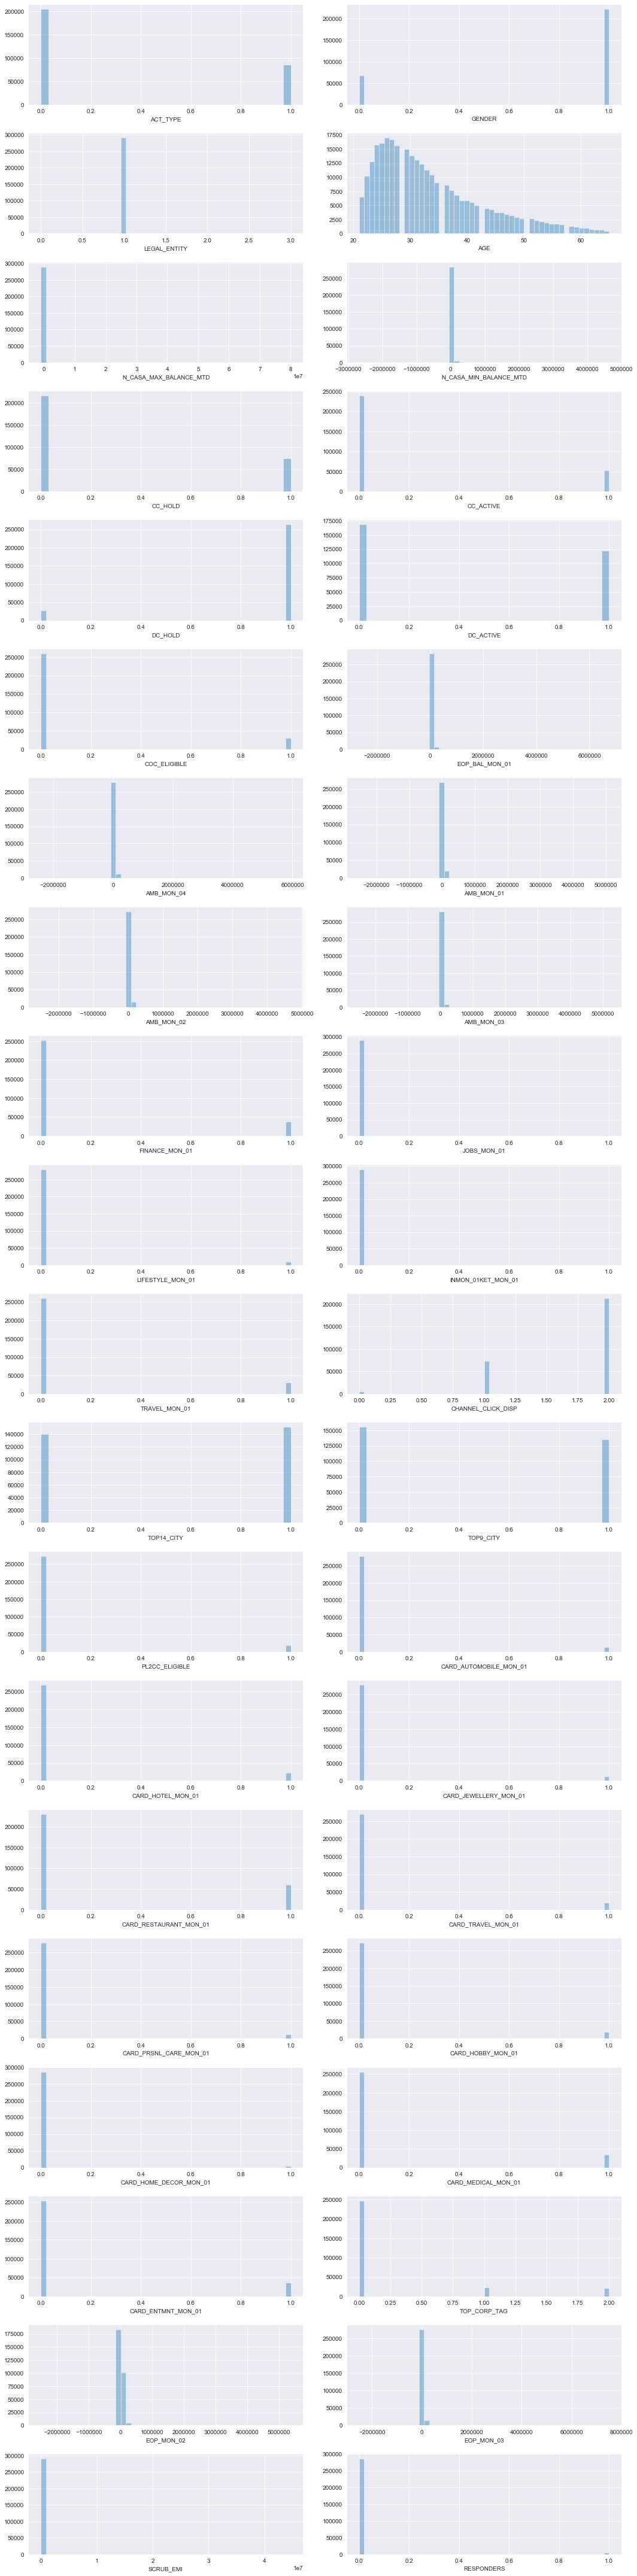

In [16]:
fig = plt.figure(figsize=(15,60))
for index,col in enumerate(df.columns):
    plt.subplot(20,2,index+1)
    sns.distplot(df.loc[:,col],kde=False)
fig.tight_layout(pad=1.5)

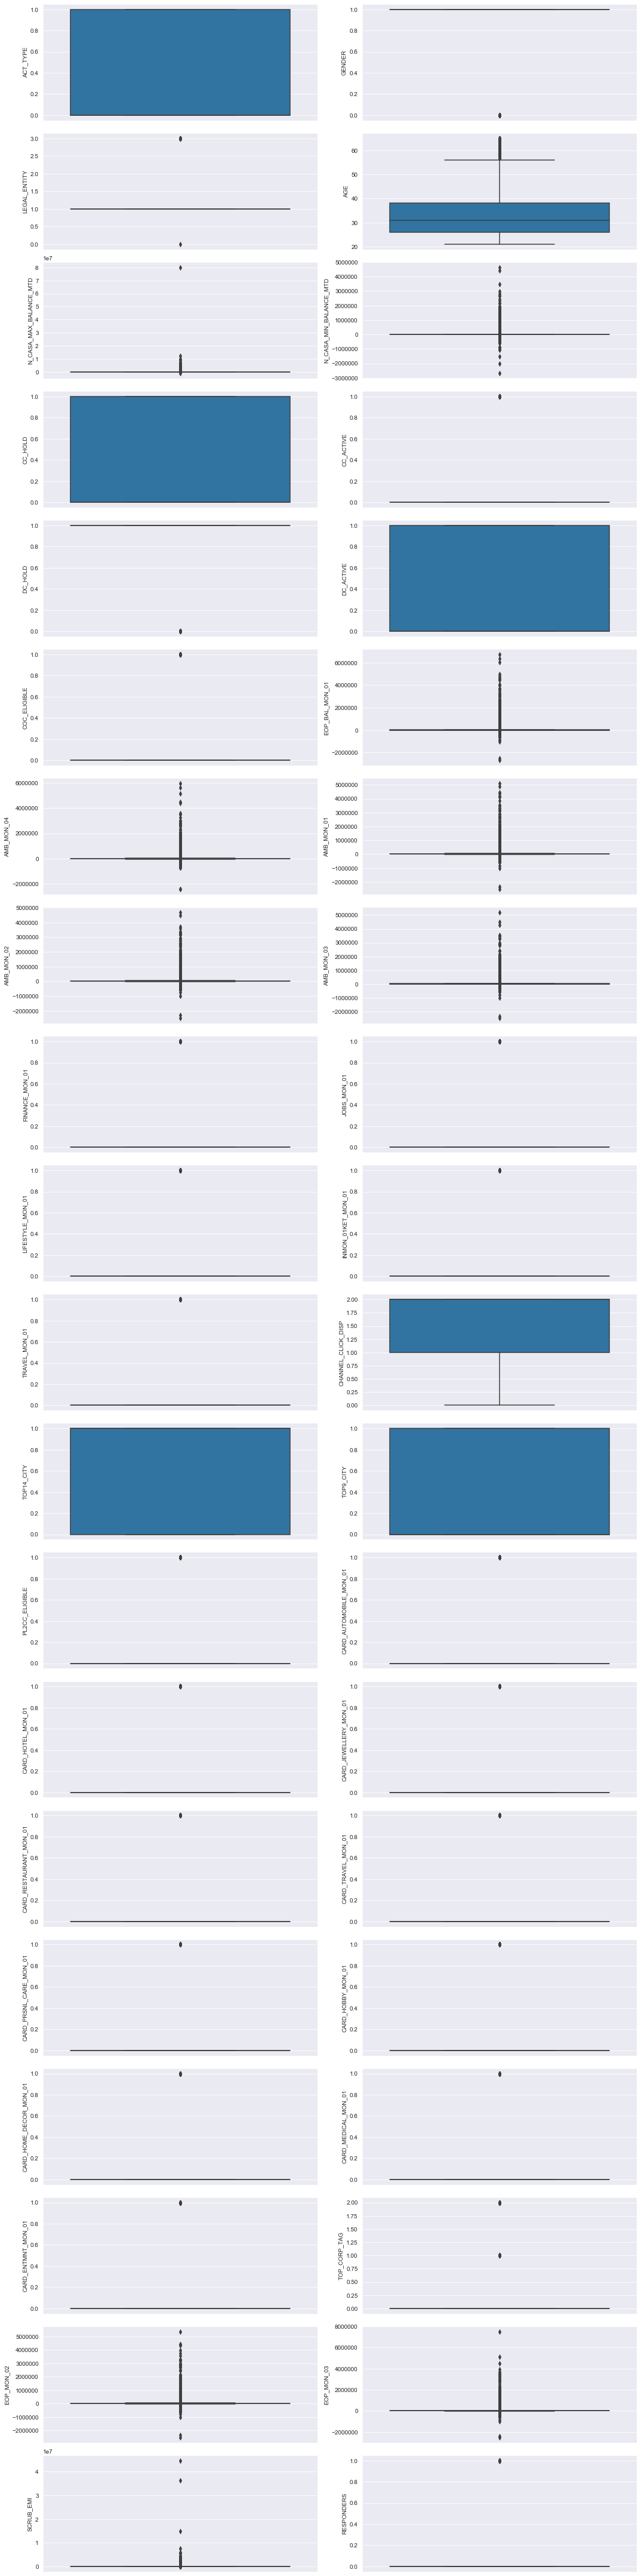

In [17]:
fig = plt.figure(figsize=(15,60))
for index,col in enumerate(df.columns):
    plt.subplot(20,2,index+1)
    sns.boxplot(y=col,data=df,)
fig.tight_layout(pad=1.0)

In [18]:
df.drop(['LEGAL_ENTITY', 'ACT_TYPE','GENDER',
        'TOP14_CITY','CC_HOLD', 'CC_ACTIVE',
        'JOBS_MON_01','LIFESTYLE_MON_01','INMON_01KET_MON_01','FINANCE_MON_01','TRAVEL_MON_01','PL2CC_ELIGIBLE',
        'CARD_AUTOMOBILE_MON_01','CARD_HOTEL_MON_01','CARD_JEWELLERY_MON_01','DC_HOLD','DC_ACTIVE','COC_ELIGIBLE',
         'CARD_AUTOMOBILE_MON_01', 'CARD_HOTEL_MON_01',
       'CARD_JEWELLERY_MON_01', 'CARD_RESTAURANT_MON_01', 'CARD_TRAVEL_MON_01',
       'CARD_PRSNL_CARE_MON_01', 'CARD_HOBBY_MON_01', 'CARD_HOME_DECOR_MON_01',
       'CARD_MEDICAL_MON_01', 'CARD_ENTMNT_MON_01', 'TOP_CORP_TAG',
       'TOP9_CITY'],axis=1,inplace=True) 

### Filtering Outliers

In [19]:
df = df[df['AMB_MON_04'].between(-700000,1500000)]
df = df[df['AMB_MON_03'].between(-1000000,1500000)]
df = df[df['AMB_MON_02'].between(-1000000,1250000)]
df = df[df['AMB_MON_01'].between(-1000000,1000000)]
df = df[df['EOP_MON_02'].between(-1000000,1100000)]
df = df[df['EOP_MON_03'].between(-1000000,1250000)]
df = df[df['EOP_BAL_MON_01'].between(-500000,1000000)]
df = df[df['N_CASA_MIN_BALANCE_MTD'].between(-500000,3000000)]
df = df[df['N_CASA_MAX_BALANCE_MTD'].between(-300000,2000000)]
df = df[df['SCRUB_EMI']<1000000]

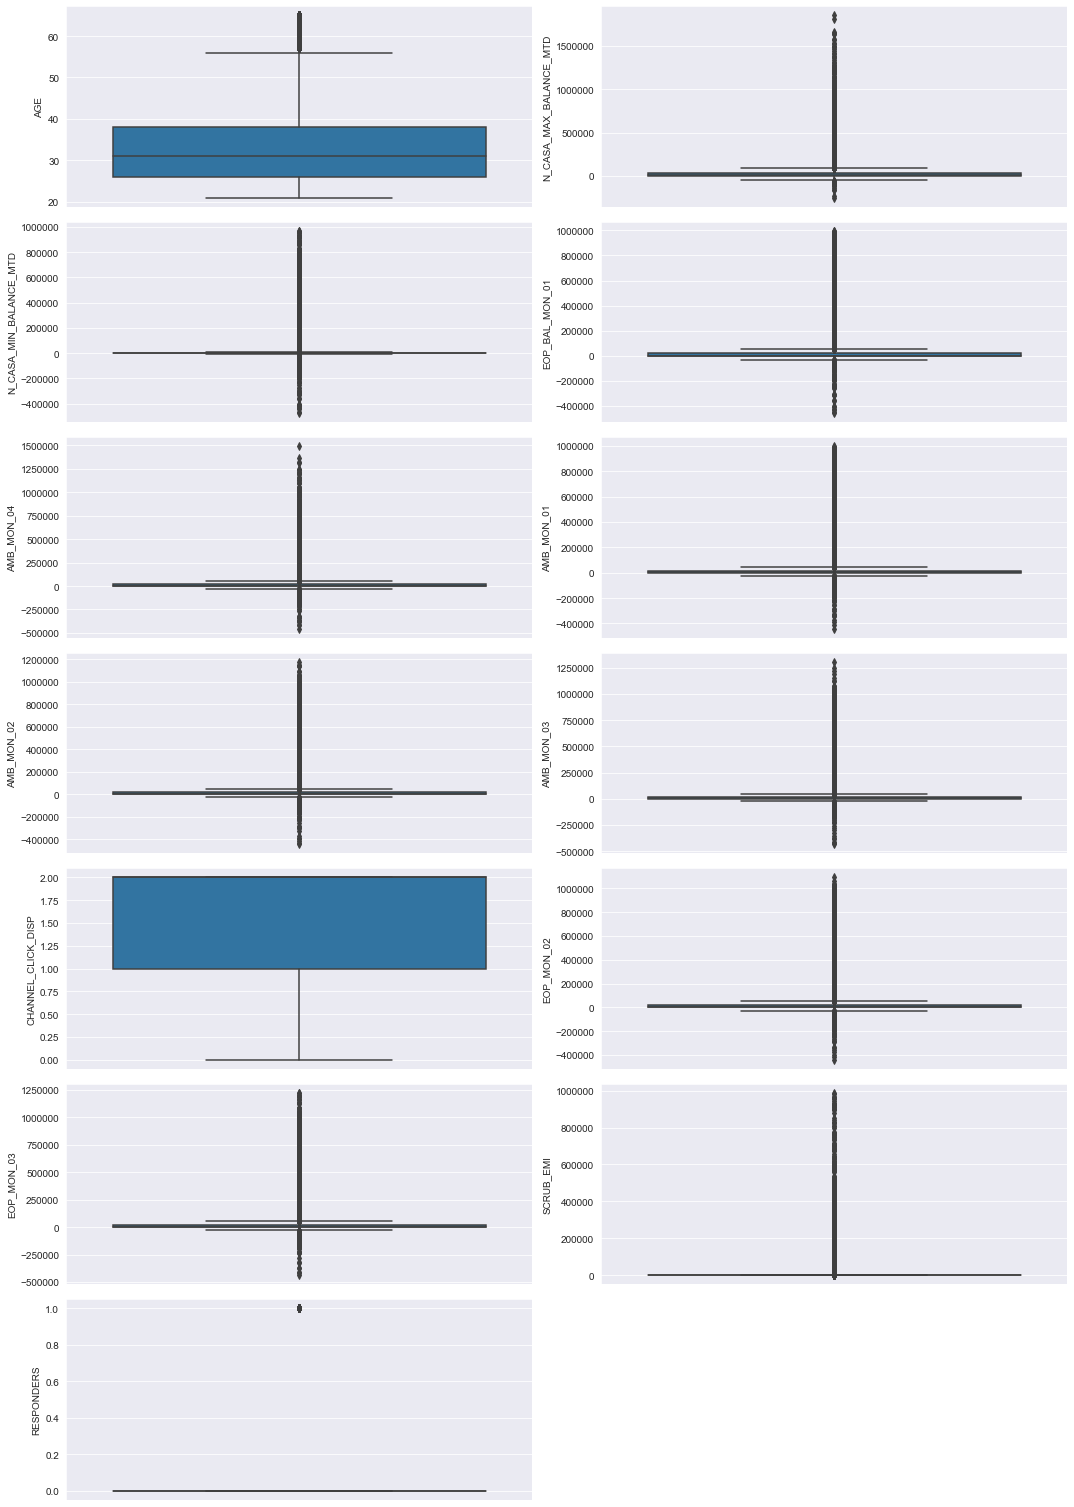

In [20]:
fig = plt.figure(figsize=(15,60))
for index,col in enumerate(df.columns):
    plt.subplot(20,2,index+1)
    sns.boxplot(y=col,data=df,)
fig.tight_layout(pad=1.0)

### Bivarient Analysis

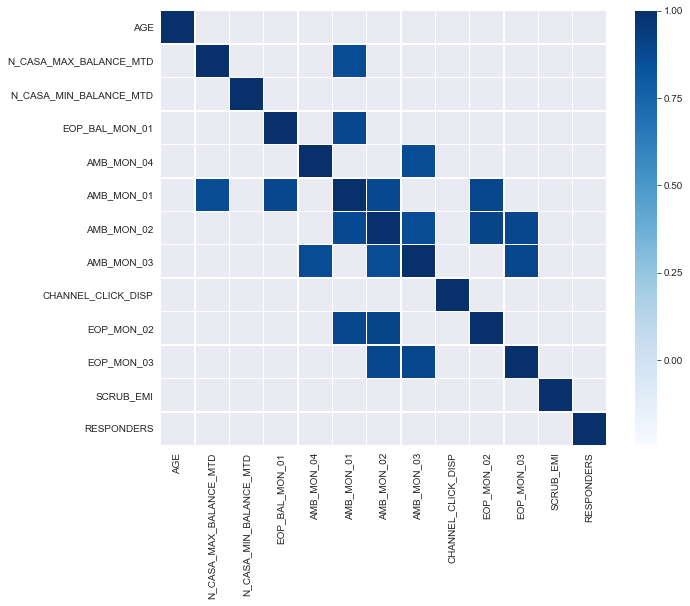

In [21]:
plt.figure(figsize=(10,8))
correlation = df.corr()
sns.heatmap(correlation, mask = correlation <0.85, linewidth=0.5,cmap='Blues')

In [22]:
df.drop(['N_CASA_MAX_BALANCE_MTD','AMB_MON_04','AMB_MON_03','AMB_MON_02','AMB_MON_01'],axis=1,inplace=True)

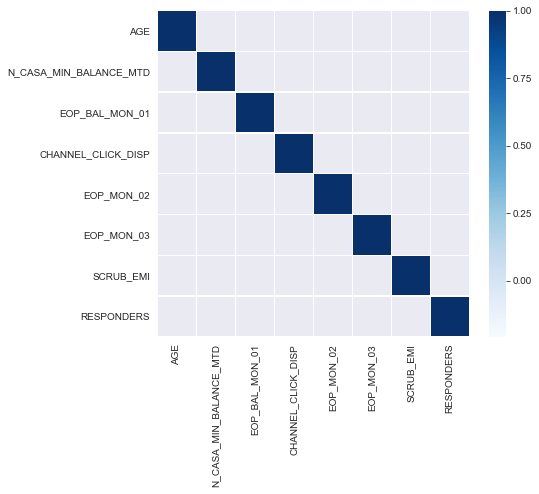

In [23]:
plt.figure(figsize=(7,6))
correlation = df.corr()
sns.heatmap(correlation, mask = correlation <0.85, linewidth=0.5,cmap='Blues')

In [24]:
X = df.iloc[:,:-1].copy()
y = df.iloc[:,-1].copy()

### Multivarient Analysis

In [25]:
import statsmodels.api as sm

X = sm.add_constant(X)
X_opt = X.iloc[:, [0,1,2,3,4,5,6,7]]
reg_OLS = sm.OLS(y,X_opt).fit()
reg_OLS.summary()

C:\Users\ARNAB\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             RESPONDERS   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     291.1
Date:                Sun, 28 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:07:27   Log-Likelihood:             1.9422e+05
No. Observations:              290509   AIC:                        -3.884e+05
Df Residuals:                  290501   BIC:                        -3.883e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0562      0.001     48.558      0.000       0.054       0.058
AGE                       -0.0002   2.45e-05     -6.347      0.000      -0.000      -0.000
N_CASA_MIN_BALANCE_MTD -6.282e-08   1.04e-08     -6.060      0.000   -8.31e-08   -4.25e-08
EOP_BAL_MON_01         -1.146e-08    7.5e-09     -1.527      0.127   -2.62e-08    3.24e-09
CHANNEL_CLICK_DISP        -0.0204      0.000    -41.328      0.000      -0.021      -0.019
EOP_MON_02             -1.023e-08   9.25e-09     -1.107      0.269   -2.84e-08    7.89e-09
EOP_MON_03              3.699e-08    7.7e-09      4.806      0.000    2.19e-08    5.21e-08
SCRUB_EMI              -4.886e-10   1.17e-08     -0.042      0.967   -2.34e-08    2.24e-08
==============================================================================
Omnibus:                   378809.053   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         43298375.002
Skew:                           7.703   Prob(JB):                         0.00
Kurtosis:                      60.790   Cond. No.                     5.11e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
X.drop(['EOP_BAL_MON_01','SCRUB_EMI','EOP_MON_02'],axis=1,inplace=True)

In [27]:
import statsmodels.api as sm

X = sm.add_constant(X)
X_opt = X.iloc[:, [0,1,2,3,4]]
reg_OLS = sm.OLS(y,X_opt).fit()
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             RESPONDERS   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     508.1
Date:                Sun, 28 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:07:28   Log-Likelihood:             1.9422e+05
No. Observations:              290509   AIC:                        -3.884e+05
Df Residuals:                  290504   BIC:                        -3.884e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0558      0.001     48.764      0.000       0.054       0.058
AGE                       -0.0002   2.45e-05     -6.337      0.000      -0.000      -0.000
N_CASA_MIN_BALANCE_MTD -7.681e-08   8.45e-09     -9.086      0.000   -9.34e-08   -6.02e-08
CHANNEL_CLICK_DISP        -0.0202      0.000    -41.404      0.000      -0.021      -0.019
EOP_MON_03              2.668e-08   5.95e-09      4.487      0.000     1.5e-08    3.83e-08
==============================================================================
Omnibus:                   378814.250   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         43300710.245
Skew:                           7.703   Prob(JB):                         0.00
Kurtosis:                      60.792   Cond. No.                     3.27e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Seeing how biased 'y' is

In [28]:
y.value_counts()

0    285939
1      4570
Name: RESPONDERS, dtype: int64

### Scaling and Spliting Data

In [29]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X=sc_X.fit_transform(X)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Dimension Reduction 

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

C:\Users\ARNAB\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Testing Regressor

In [33]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [34]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[57184,     0],
       [  918,     0]], dtype=int64)

### Visualization Train

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


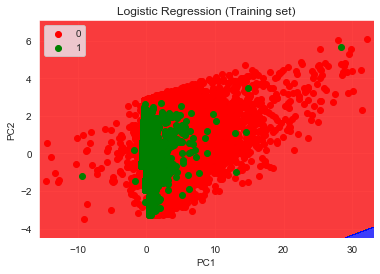

In [35]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### Visualization Test

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


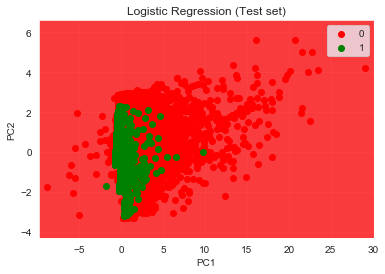

In [36]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()